###Setting Environment

In [8]:
#imports 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('always') 

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Loading Data for Training 
(From EDA)

In [2]:
import pickle
filename = ['trainX.sav', 'trainY.sav', 'testX.sav', 'testY.sav']
 
X_train = pickle.load(open(filename[0], 'rb'))
y_train = pickle.load(open(filename[1], 'rb'))
X_test = pickle.load(open(filename[2], 'rb'))
y_test = pickle.load(open(filename[3], 'rb'))

### Models
Baseline, K-nearest neighbours, Logistic Regression, SVM, Random Forest, Gradient Boosting

In [10]:
seed = 2
acc_results = {}
def train_model(name,model):
  m = model.fit(X_train,y_train)
  y_pred = m.predict(X_test)
  
  accuracy = accuracy_score(y_test, y_pred)
  acc_results[name] = accuracy

  print('Classifier: {}'.format(name))
  print('\nReport', classification_report(y_test, y_pred))
  print('\nAccuracy: {}'.format(accuracy))
  #print('\nConfusion matrix:\n', confusion_matrix(y_test,y_pred))
  cf_matrix = confusion_matrix(y_test,y_pred)
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")
  ax.set_title('Confusion Matrix');
  ax.set_xlabel('Predicted Values')
  ax.set_ylabel('Actual Values ')
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])
  plt.show()

#### Default Parameters

##### Baseline (Dummy Classifier)

Classifier: dummy classifier

Report               precision    recall  f1-score   support

           0       0.49      1.00      0.66      1275
           1       0.00      0.00      0.00      1312

    accuracy                           0.49      2587
   macro avg       0.25      0.50      0.33      2587
weighted avg       0.24      0.49      0.33      2587


Accuracy: 0.49284885968303055


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


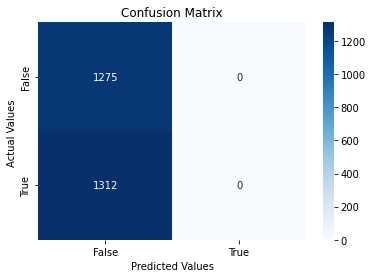

In [11]:
model = DummyClassifier(random_state=seed, strategy='most_frequent')
train_model("dummy classifier", model)

##### KNeighborsClassifier

Classifier: KNeighborsClassifier

Report               precision    recall  f1-score   support

           0       0.83      0.68      0.74      1275
           1       0.73      0.86      0.79      1312

    accuracy                           0.77      2587
   macro avg       0.78      0.77      0.77      2587
weighted avg       0.78      0.77      0.77      2587


Accuracy: 0.7696173173560108


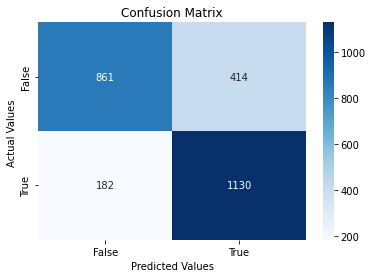

In [12]:
model = KNeighborsClassifier()
train_model( "KNeighborsClassifier", KNeighborsClassifier())

#### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier: LogisticRegression

Report               precision    recall  f1-score   support

           0       0.79      0.75      0.77      1275
           1       0.77      0.81      0.79      1312

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587


Accuracy: 0.7788944723618091


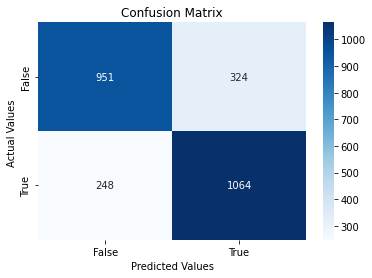

In [13]:
model = LogisticRegression(random_state=seed)
train_model("LogisticRegression", model)

#### Support Vector Machines

Classifier: SupportVectorMachines

Report               precision    recall  f1-score   support

           0       0.81      0.74      0.78      1275
           1       0.77      0.84      0.80      1312

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587


Accuracy: 0.7904909161190569


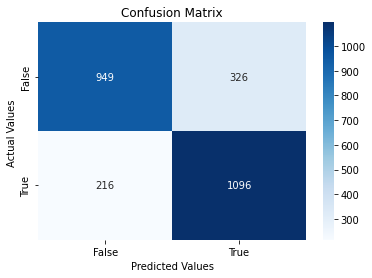

In [14]:
model = SVC(random_state=seed)
train_model("SupportVectorMachines", model)

#### Decision Tree Classifier

Classifier: DecisionTreeClassifier

Report               precision    recall  f1-score   support

           0       0.95      0.82      0.88      1275
           1       0.85      0.95      0.90      1312

    accuracy                           0.89      2587
   macro avg       0.90      0.89      0.89      2587
weighted avg       0.90      0.89      0.89      2587


Accuracy: 0.8898337843061461


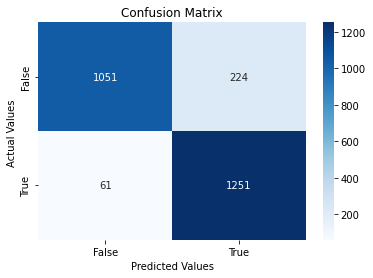

In [15]:
model = DecisionTreeClassifier(random_state=seed)
train_model("DecisionTreeClassifier", model)

#### Random Forest Classifier

Classifier: RandomForestClassifier

Report               precision    recall  f1-score   support

           0       0.96      0.86      0.91      1275
           1       0.88      0.97      0.92      1312

    accuracy                           0.91      2587
   macro avg       0.92      0.91      0.91      2587
weighted avg       0.92      0.91      0.91      2587


Accuracy: 0.9141863161963665


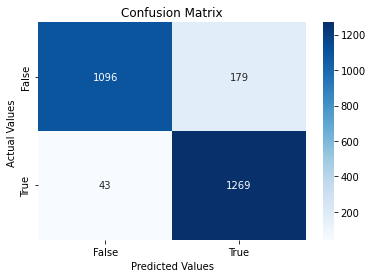

In [16]:
model = RandomForestClassifier(random_state=seed)
train_model("RandomForestClassifier", model)

#### Gradient Boosting Classifier

Classifier: GradientBoostingClassifier

Report               precision    recall  f1-score   support

           0       0.80      0.75      0.78      1275
           1       0.77      0.82      0.80      1312

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587


Accuracy: 0.7881716273676073


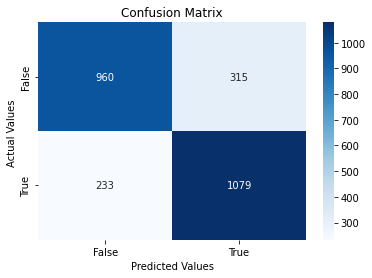

In [17]:
model = GradientBoostingClassifier(random_state=seed)
train_model("GradientBoostingClassifier", model)

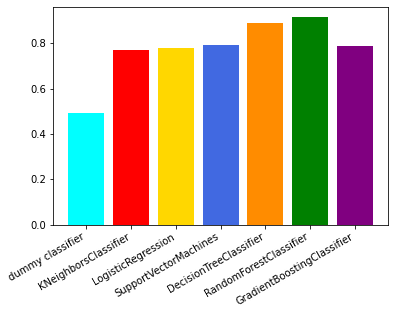

In [18]:
colors = ['aqua', 'red', 'gold', 'royalblue', 'darkorange', 'green', 'purple', 'steelblue', 'yellow', 'lime', 'magenta']
plt.bar(list(acc_results.keys()), acc_results.values(),  color=colors)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()